In [1]:
import cobra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import warnings
%load_ext autoreload


from src import *

In [2]:
model = cobra.io.read_sbml_model('data/iML1515.xml')
print(f'The biomass functions defined in the model are:\n{model.reactions.get_by_id("BIOMASS_Ec_iML1515_WT_75p37M")} \n{model.reactions.get_by_id("BIOMASS_Ec_iML1515_core_75p37M")}')

The biomass functions defined in the model are:
BIOMASS_Ec_iML1515_WT_75p37M: 0.000223 10fthf_c + 0.000223 2dmmql8_c + 2.5e-05 2fe2s_c + 0.000248 4fe4s_c + 0.000223 5mthf_c + 0.000279 accoa_c + 0.000223 adocbl_c + 0.499149 ala__L_c + 0.000223 amet_c + 0.28742 arg__L_c + 0.234232 asn__L_c + 0.234232 asp__L_c + 75.55223 atp_c + 2e-06 btn_c + 0.004952 ca2_c + 0.000223 chor_c + 0.004952 cl_c + 0.002944 clpn160_p + 0.00229 clpn161_p + 0.00118 clpn181_p + 0.000168 coa_c + 2.4e-05 cobalt2_c + 0.008151 colipa_e + 0.129799 ctp_c + 0.000674 cu2_c + 0.088988 cys__L_c + 0.024805 datp_c + 0.025612 dctp_c + 0.025612 dgtp_c + 0.024805 dttp_c + 0.000223 enter_c + 0.000223 fad_c + 0.006388 fe2_c + 0.007428 fe3_c + 0.255712 gln__L_c + 0.255712 glu__L_c + 0.595297 gly_c + 0.154187 glycogen_c + 0.000223 gthrd_c + 0.209121 gtp_c + 70.028756 h2o_c + 0.000223 hemeO_c + 0.092056 his__L_c + 0.282306 ile__L_c + 0.18569 k_c + 0.437778 leu__L_c + 3e-06 lipopb_c + 0.333448 lys__L_c + 3.1e-05 malcoa_c + 0.149336 me

In [3]:
df = pd.read_csv('data/pcbi.1008528.s002 - Biomasses_used.csv', skiprows=1).set_index('Unnamed: 0')
df

,10fthf[c],pydx5p[c],murein3px4p[p],thr__L[c],clpn161[p],gthrd[c],thmpp[c],ni2[c],mn2[c],mocogdp[c],...,dgtp[c],fad[c],succoa[c],->,h[c],adp[c],pi[c],ppi[c],GlucoseUptake,AmoniumUptake
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Class,cofactor,energy,carbohydrate,protein,lipid,protein,energy,ion,ion,DNA,...,DNA,energy,cofactor,NaN,energy,energy,energy,energy,NaN,NaN
MW,473.4393,245.127,1750.6741,119.119,1345.7824,306.316,422.292,58.692,54.937,737.535,...,573.1265,785.5497,862.57,NaN,1,424.179,95.98,174.953,NaN,NaN
WT,0.0001809369184,0.0001809369184,0.000490882671,0.2000123756,0.001858051763,0.0001809369184,0.0001809369184,0.0002490925289,0.0005338856157,0.00000567963421,...,0.0207809702,0.0001809369184,0.00007951487894,->,61.15927482,61.15927482,61.15602932,0.6808659529,-18.0,-18.0
Core,0.0002075503304,0.0002075503304,0,0.2361140956,0,0,0.0002075503304,0.0003006222275,0.0006431268086,0,...,0.02514523443,0.0002075503304,0.00009121045911,->,70.15498998,70.15498998,70.15126711,0.8241377417,-18.0,-18.0
Mean,0.0001942436244,0.0001942436244,0.0002454413355,0.2180632356,0.0009290258815,0.0000904684592,0.0001942436244,0.0002748573782,0.0005885062122,0.000002839817105,...,0.02296310231,0.0001942436244,0.00008536266902,->,65.6571324,65.6571324,65.65364821,0.7525018473,-18.0,-18.0
CarbStarv,0.0001403066433,0.00009353776217,0.00001181919527,0.1837641131,0.00005815825507,0.00007623869345,0.00002338444054,0.00007279646518,0.0001558669164,0.000001299134687,...,0.01050495917,0.00002338444054,0.0000616594217,->,7.904276465,7.904276465,7.903857013,0.3762509236,-0.5,-18.0
NitStarv,0.0003837216192,0.0002877912144,0.001818228532,0.02153882222,0.009176293858,0.000008935866945,0.0003837216192,0.0001357428314,0.0002906434604,0.00000154273936,...,0.01247477583,0.0003837216192,0.0001686310255,->,129.7034136,129.7034136,129.6965307,3.010007389,-18.0,-0.5


In [4]:
BOFs = {
    'WT': build_BOF(model, df, 'WT'),
    'CarbStarv': build_BOF(model, df, 'CarbStarv'),
    'NitStarv': build_BOF(model, df, 'NitStarv'),
    }

# Adding biomass functions
for reaction in BOFs.values():
    model.add_reactions([reaction])

# Setting bounds of all biomasses to (0,0)
for biomass in list(BOFs.keys())+['BIOMASS_Ec_iML1515_core_75p37M', 'BIOMASS_Ec_iML1515_WT_75p37M']:
    model.reactions.get_by_id(biomass).bounds = (0,0)

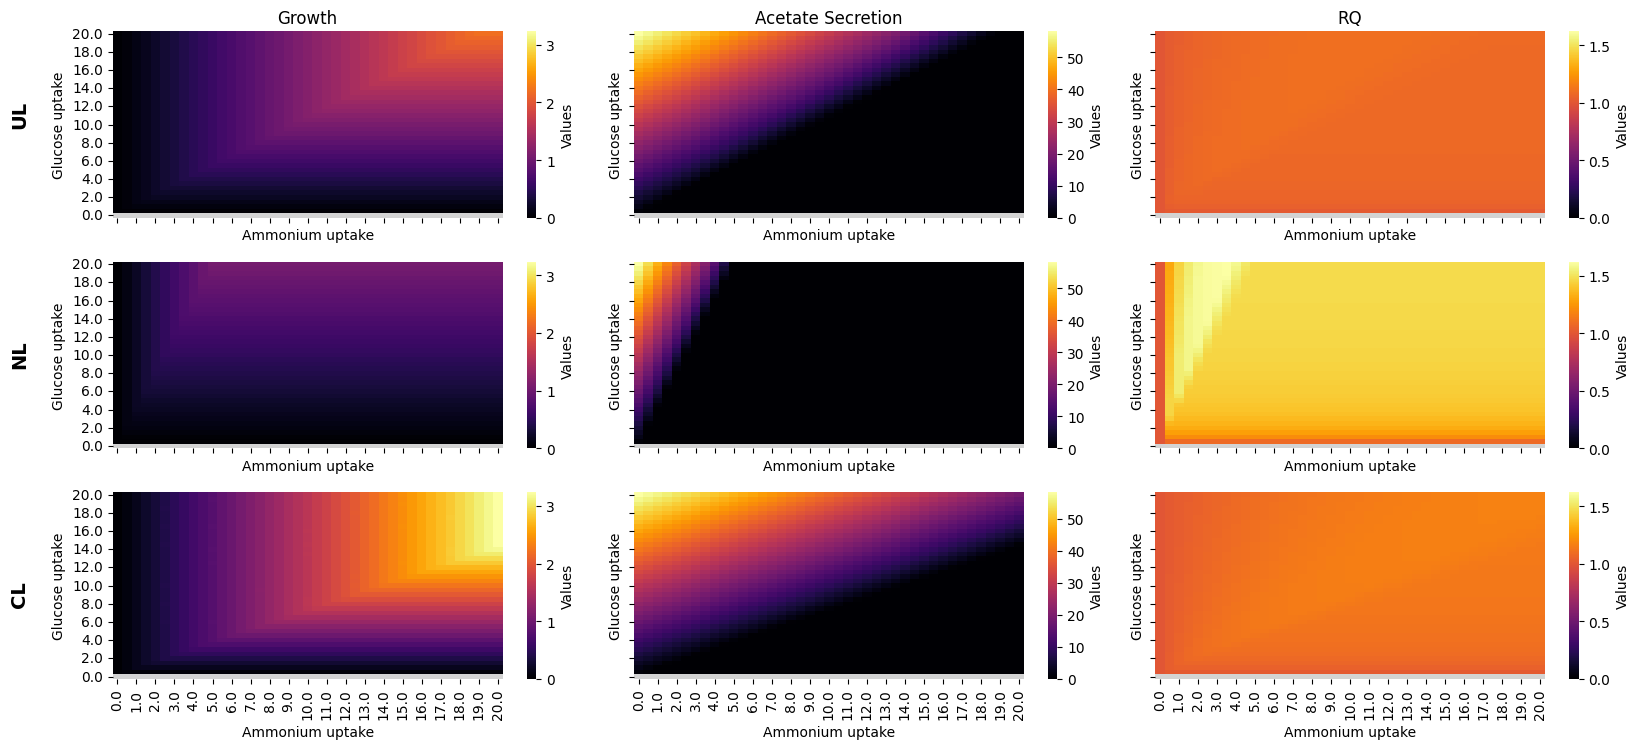

In [28]:
with warnings.catch_warnings():
    df = pd.read_csv('figure_1_data_4040.csv')
    warnings.simplefilter("ignore")
    fig_1_plot(df)
# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
#     fig_1_df = fig_1(model)
#     fig_1_df.to_csv('figure_1_data.csv')


In [70]:
def BTW(model, BOFs, res):
    weights = np.linspace(0, 1, res)
    weight_combinations = [
    (w1, w2, 1 - w1 - w2) for w1, w2 in itertools.product(weights, repeat=2)
    if (w1 + w2) <= 1
    ]
    dfs = []
    for w in weight_combinations:
        df = fig_1_row(model=model, BOF={model.reactions.get_by_id(bof): w for bof, w in zip(BOFs, w)}, res = 5)
        print(df)
        dfs.append(df)
    return pd.concat(dfs)
    #return pd.concat([fig_1_row(model=model, BOF={model.reactions.get_by_id(bof): w for bof, w in zip(BOFs, w)}, res = 5) for w in weight_combinations], axis = 0)

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    BTW_df = BTW(model,BOFs = ['WT', 'NitStarv', 'CarbStarv'], res = 5)
    BTW_df.to_csv('figure_2_data.csv')

In [78]:
BTW_df.sort_values('Growth', ascending=False).drop_duplicates(['Glucose', 'Ammonium'], keep='first').reset_index(drop=True)

,BOF,Glucose,Ammonium,Growth,Acetate,RQ
0,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,15.0,20.0,3.231938,2.388840e+00,1.148674
1,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,20.0,20.0,3.231938,1.850450e+01,1.175191
2,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,20.0,15.0,2.423953,2.869015e+01,1.168433
3,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,15.0,15.0,2.423953,1.371582e+01,1.169324
4,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,10.0,15.0,2.240241,-8.896083e-13,1.136302
5,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,10.0,20.0,2.240241,1.791158e-14,1.136302
6,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,15.0,10.0,1.615969,2.383629e+01,1.154626
7,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,20.0,10.0,1.615969,3.850966e+01,1.141576
8,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,10.0,10.0,1.615969,8.926103e+00,1.158647
9,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,5.0,10.0,1.087649,-1.373221e-13,1.117429


In [8]:
# Setting the bounds of all biomass reactions to zero initially

def BTW(model,  BOFs, res = 10, tol = 1e-10):
    for biomass in BOFs + ['BIOMASS_Ec_iML1515_core_75p37M', 'BIOMASS_Ec_iML1515_WT_75p37M']:
        model.reactions.get_by_id(biomass).bounds = (0, 0)

    # Define glucose and ammonium uptake ranges
    ammonium = -np.linspace(0,20, res)
    glucose = -np.linspace(0,20, res)

    # Dataframe to store results
    df = pd.DataFrame(columns=['BOF','Glucose', 'Ammonium', 'Growth', 'Acetate', 'RQ'])


    # Generating weights
    weights = np.linspace(0, 1, res)
    weight_combinations = [
    (w1, w2, 1 - w1 - w2) for w1, w2 in itertools.product(weights, repeat=2)
    if (w1 + w2) <= 1
    ]
   
    best_growth = 0
    # Loop over glucose and ammonium uptake combinations
    for am, gl in itertools.product(glucose, ammonium):
        for w in weight_combinations:
            # Set the bounds for glucose and ammonium uptake
            model.reactions.get_by_id('EX_glc__D_e').bounds = (gl, gl)
            model.reactions.get_by_id('EX_nh4_e').bounds = (am, am)
            model.reactions.get_by_id('EX_ac_e').bounds = (0,1000)
            BOF={model.reactions.get_by_id(bof): w for bof, w in zip(BOFs, w)}
            if isinstance(BOF, str):
                model.reactions.get_by_id(BOF).bounds = (0,1000)
            elif isinstance(BOF, dict):
                for reaction in BOF.keys():
                    reaction.bounds = (0,1000)
            row = [BOF, -gl, -am]

            # Step 1: Maximize growth (BOF)
            model.objective = BOF
            sol = model.optimize('maximize')
            growth_flux = FBA(model, BOF)
            if growth_flux>tol and best_growth<growth_flux:
                row.append(sol.objective_value)
            else: 
                row += [0,0,0]
                df.loc[len(df.index)] = row
                continue

            # Step 2: Fix the growth rate to the optimized value
            if isinstance(BOF, str):
                model.reactions.get_by_id(BOF).bounds = (growth_flux, growth_flux)
            elif isinstance(BOF, dict):
                for reaction, w in BOF.items():
                    reaction.bounds = (w*growth_flux,w*growth_flux)


            # Step 3: Maximize acetate secretion
            acetate_flux = FBA(model, 'EX_ac_e')
            row.append(acetate_flux)

            # Step 4: Fix acetate secretion rate
            model.reactions.get_by_id('EX_ac_e').bounds = (acetate_flux, acetate_flux)

            # Step 5: Perform parsimonious FBA (pFBA)
            row.append(pFBA_rq(model, BOF))
            
            # Append row to dataframe
            df.loc[len(df.index)] = row
    
    # Reset BOF bounds after the loop
    if isinstance(BOF, str):
            model.reactions.get_by_id(BOF).bounds = (0,1000)
    elif isinstance(BOF, dict):
        for reaction in BOF.keys():
            reaction.bounds = (0,1000)
    return df
   


In [15]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    BTW_df = BTW(model,BOFs = ['WT', 'NitStarv', 'CarbStarv'], res = 5)
    BTW_df.to_csv('figure_2_data.csv')

Error in pFBA: None (infeasible).
Error in pFBA: None (infeasible).
Error in pFBA: None (infeasible).
Error in pFBA: None (infeasible).
Error in pFBA: None (infeasible).
Error in pFBA: None (infeasible).
Error in pFBA: None (infeasible).
Error in pFBA: None (infeasible).
Error in pFBA: None (infeasible).
Error in pFBA: None (infeasible).
Error in pFBA: None (infeasible).
Error in pFBA: None (infeasible).
Error in pFBA: None (infeasible).
Error in pFBA: None (infeasible).
Error in pFBA: None (infeasible).
Error in pFBA: None (infeasible).
Error in pFBA: None (infeasible).
Error in pFBA: None (infeasible).
Error in pFBA: None (infeasible).
Error in pFBA: None (infeasible).
Error in pFBA: None (infeasible).
Error in pFBA: None (infeasible).
Error in pFBA: None (infeasible).
Error in pFBA: None (infeasible).
Error in pFBA: None (infeasible).
Error in pFBA: None (infeasible).
Error in pFBA: None (infeasible).
Error in pFBA: None (infeasible).
Error in pFBA: None (infeasible).
Error in pFBA:

In [16]:
BTW_df

,BOF,Glucose,Ammonium,Growth,Acetate,RQ
0,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,5.0,5.0,0.807984,4.136385e+00,1.133410
1,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,5.0,5.0,0.605988,0.000000e+00,0.000000
2,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,5.0,5.0,0.413268,0.000000e+00,0.000000
3,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,5.0,5.0,0.246371,1.729580e+00,1.120744
4,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,5.0,5.0,0.222076,-6.396730e-14,1.141461
...,...,...,...,...,...,...
235,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,20.0,20.0,1.105385,2.208869e+01,0.933412
236,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,20.0,20.0,1.089700,1.055815e+01,1.100022
237,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,20.0,20.0,1.634549,2.056019e+01,0.930608
238,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,20.0,20.0,1.634549,1.373017e-01,1.113932


In [17]:
BTW_df.sort_values('Growth', ascending=False).drop_duplicates(['Glucose', 'Ammonium'], keep='first').reset_index(drop=True)

,BOF,Glucose,Ammonium,Growth,Acetate,RQ
0,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,15.0,20.0,3.231938,2.388840e+00,1.148674
1,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,20.0,20.0,3.231938,1.850450e+01,1.175191
2,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,15.0,15.0,2.423953,1.371582e+01,1.169324
3,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,20.0,15.0,2.423953,2.869015e+01,1.168433
4,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,10.0,15.0,2.192750,5.941915e-15,1.063343
5,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,10.0,20.0,1.973607,-1.906505e-14,0.849352
6,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,15.0,10.0,1.615969,2.383629e+01,1.154626
7,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,10.0,10.0,1.615969,8.926102e+00,1.158647
8,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,20.0,10.0,1.615969,3.850966e+01,1.141576
9,{WT: 0.0001809369184 10fthf_c + 0.000180936918...,20.0,5.0,1.051254,-8.891825e-13,1.475084


In [14]:

%autoreload 2
